# Pymaceuticals Inc.
---

### Analysis of Drug Regimen Data

    The dataset provides statistical summaries for the different drug regimens tested on mice. 
    The study involved 249 unique mice, with a very near gender distribution, with male and female mice showing less than a 1% difference. This balance ensures that the results are not linked by gender.
    The key findings are that Capomulin has the lowest mean (40.68), followed closely by Ramicane (40.22). It suggests a less impactful effect compared to others but demonstrates higher consistency in results. These two regimens exhibit the lowest standard deviations (4.99 and 4.85), suggesting that they are the most consistent in their results. The sem values for both drugs (0.33 and 0.32) further emphasize their reliability in producing consistent outcomes across the sample. 
    Ketapril and Naftisol presents the highest standard deviations (8.28 and 8.13), signaling a wider range of responses among the mice treated with these drugs. Their variance values (68.55 and 66.17) are also the highest, pointing to substantial inconsistency in how these regimens perform. It suggests that these drugs may have unpredictable effects.
    Placebo and Propiva are less consistent than the top performing treatments, with a mean of 54.03 and 52.39 respectively, but still show moderate effects with a standard deviation of 7.82 and 6.57.
    In conclusion, Capomulin and Ramicane are the most reliable drug regimens, offering consistent results with a lower variability, even their effects are relatively moderate compared to other that provides more significant effects but come with a higher variability. 

In [269]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [271]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()

# Display the result
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [273]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [275]:
# Optional: Get all the data for the duplicate mouse ID.


In [277]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [279]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice in the clean DataFrame: {num_clean_mice}")

Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [282]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()
summary_stats

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [284]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
).reset_index()
summary_stats_advanced

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

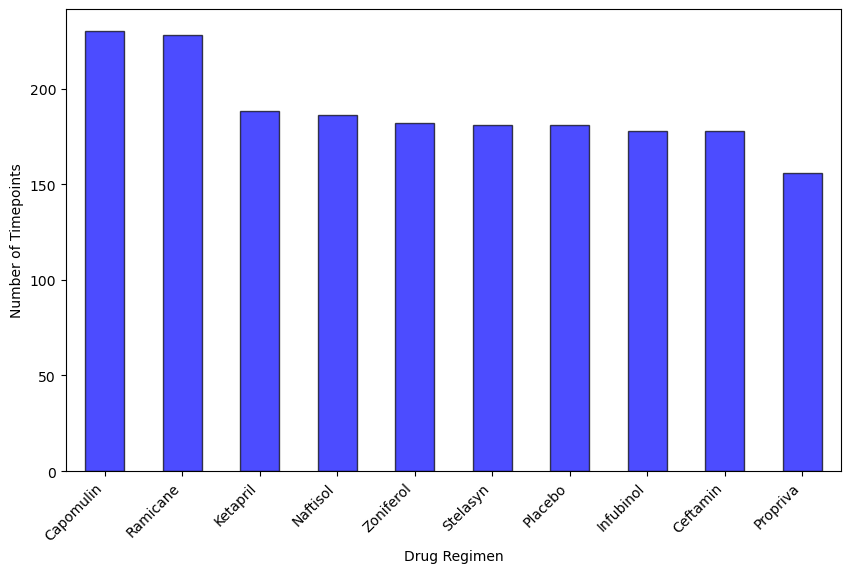

In [287]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data["Drug Regimen"].value_counts()
ax = regimen_counts.plot(kind='bar', figsize=(10,6), color='b', alpha=0.7, edgecolor='black',)
ax.set_title=("Total Number of Mouse ID/Timepoints for each drug regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Timepoints")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

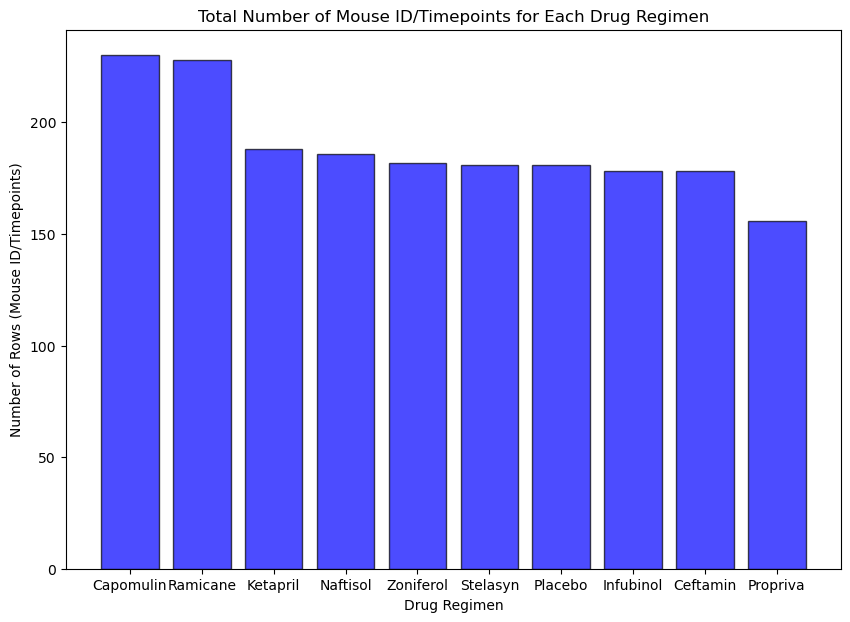

In [289]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10,7))
plt.bar(regimen_counts.index, regimen_counts.values, color='b', alpha=0.7, edgecolor='black')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen") 

plt.show()

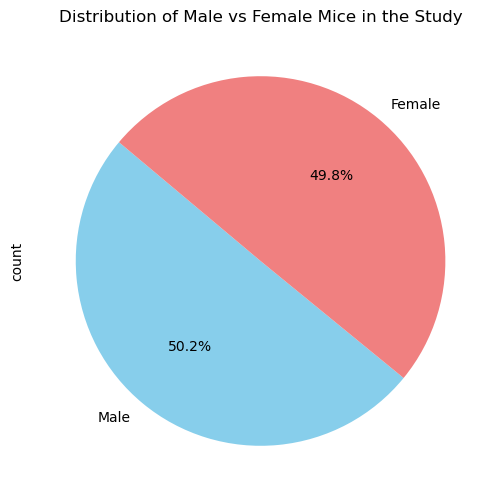

In [291]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

gender_counts = clean_data[['Mouse ID', 'Sex']].drop_duplicates()['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['skyblue', 'lightcoral'], startangle=140)
plt.title("Distribution of Male vs Female Mice in the Study")

plt.show()

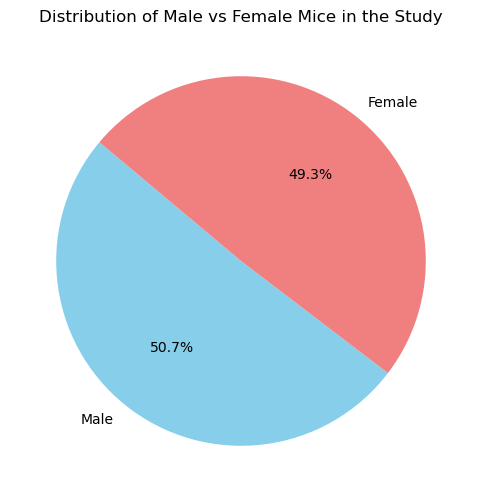

In [293]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

gender_counts = clean_data[['Mouse ID', 'Sex']]['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title("Distribution of Male vs Female Mice in the Study")

plt.show()

## Quartiles, Outliers and Boxplots

In [296]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = last_timepoint.merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")

selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_filtered = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(selected_regimens)]

final_tumor_volume_filtered.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [298]:
# Put treatments into a list for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_filtered[final_tumor_volume_filtered["Drug Regimen"] == treatment]

    # add subset
    tumor_vol_data.append(treatment_data["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    
    Q1 = treatment_data["Tumor Volume (mm3)"].quantile(0.25)
    Q3 = treatment_data["Tumor Volume (mm3)"].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = treatment_data[(treatment_data["Tumor Volume (mm3)"] < lower_bound) |
                              (treatment_data["Tumor Volume (mm3)"] > upper_bound)]
    if not outliers.empty:
        print(f"{treatment} - Potential outliers (Mouse IDs): {outliers['Mouse ID'].to_list()}")
    else:
        print(f"{treatment} - No potential outliers.")

Capomulin - No potential outliers.
Ramicane - No potential outliers.
Infubinol - Potential outliers (Mouse IDs): ['c326']
Ceftamin - No potential outliers.


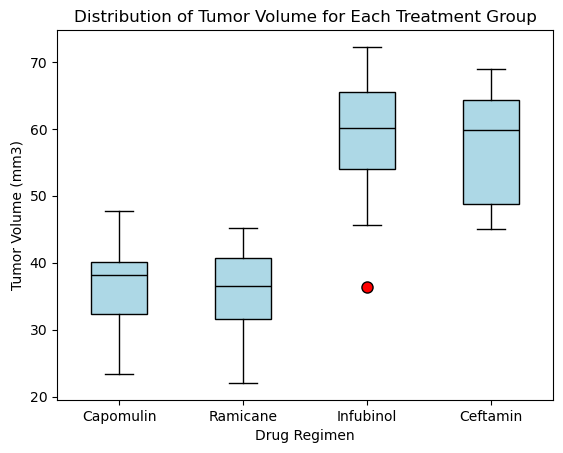

In [300]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, tick_labels=treatments, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8), medianprops=dict(color='black'))

plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

plt.show()

## Line and Scatter Plots

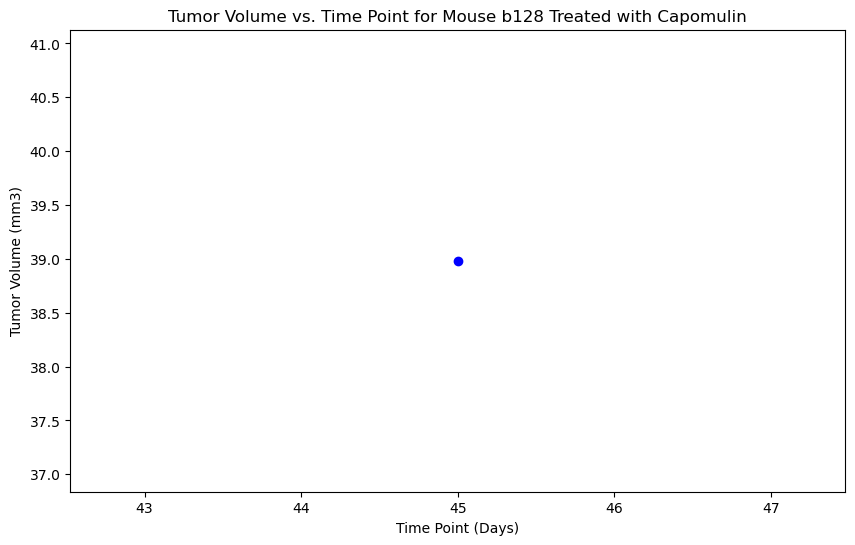

In [303]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = "b128"

capomulin_data = final_tumor_volume_filtered[(final_tumor_volume_filtered["Drug Regimen"] == "Capomulin") & 
                                            (final_tumor_volume_filtered["Mouse ID"] == mouse_id)]

plt.figure(figsize=(10,6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o', color='b')

# Labels and title
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin")

plt.show()

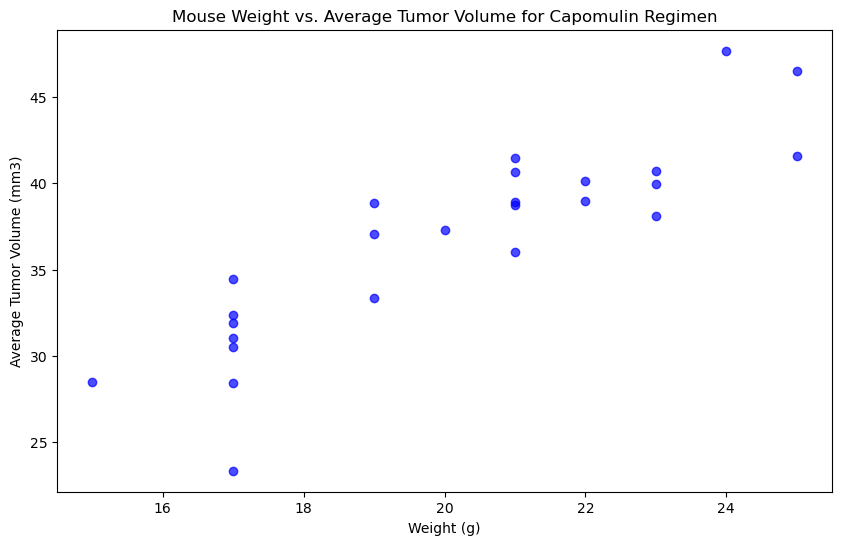

In [305]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter Capomulin regimen
capomulin_data = final_tumor_volume_filtered[final_tumor_volume_filtered["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume with the mouse weight data
avg_tumor_vol_with_weight = pd.merge(avg_tumor_vol, mouse_metadata[["Mouse ID", "Weight (g)"]], on="Mouse ID")

# Scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10,6))
plt.scatter(avg_tumor_vol_with_weight["Weight (g)"], avg_tumor_vol_with_weight["Tumor Volume (mm3)"], color='b', alpha=0.7)

# Set labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

plt.show()

## Correlation and Regression

Correlation coefficient between weight and average tumor volume: 0.88
Linear Regression Parameters: Slope = 1.75, Intercept = 1.45


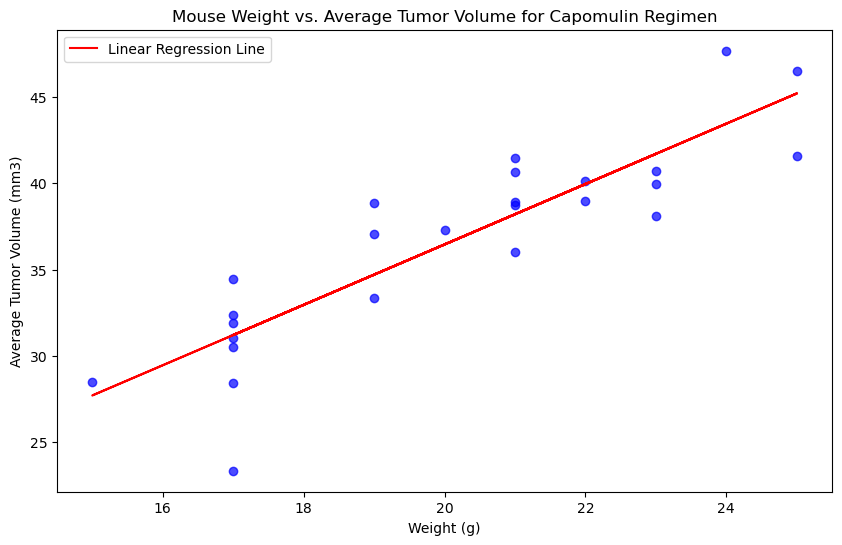

In [308]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = np.corrcoef(avg_tumor_vol_with_weight["Weight (g)"], avg_tumor_vol_with_weight["Tumor Volume (mm3)"])[0, 1]
print(f"Correlation coefficient between weight and average tumor volume: {correlation:.2f}")

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_tumor_vol_with_weight["Weight (g)"], avg_tumor_vol_with_weight["Tumor Volume (mm3)"])
print(f"Linear Regression Parameters: Slope = {slope:.2f}, Intercept = {intercept:.2f}")

# Calculate the line values for plotting
line = slope * avg_tumor_vol_with_weight["Weight (g)"] + intercept

# Plot the scatter plot and the regression line
plt.figure(figsize=(10,6))
plt.scatter(avg_tumor_vol_with_weight["Weight (g)"], avg_tumor_vol_with_weight["Tumor Volume (mm3)"], color='b', alpha=0.7)
plt.plot(avg_tumor_vol_with_weight["Weight (g)"], line, color='r', label='Linear Regression Line')

# Set labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.legend()

plt.show()